In [1]:
from functools import partial
from collections import defaultdict
import numpy as np # Numerical computing library
import matplotlib.pyplot as plt # Plotting library
import scipy.integrate #Integration library
from mpl_toolkits.mplot3d import axes3d #Used for the 3d bifurcation plot
import matplotlib.patches as mpatches #used to write custom legends
%matplotlib inline

In [36]:
scenarios1 = [{'alpha':-0.1, 'beta':2, 'epsilon':0.01},
             {'alpha':-1, 'beta':2, 'epsilon':0.01},
              ]

scenarios2 = [{'alpha':-0.1, 'beta':-10, 'epsilon':0.01},
             {'alpha':-0.1, 'beta':-1, 'epsilon':0.01},
             {'alpha':-0.1, 'beta':2, 'epsilon':0.01},
             {'alpha':-0.1, 'beta':20, 'epsilon':0.01}]

initial_conditions = [(.1,0)]
time = np.linspace(-10, 100, 1000)

In [37]:
def fhn(y, t, alpha, beta, epsilon):
    V, R = y
    return np.array([
        V*(alpha-V)*(V-1) - R,
        epsilon*(V-beta*R)])


In [38]:
trajectory = {}
for i, param in enumerate(scenarios1):
    for j,ic in enumerate(initial_conditions):
        trajectory[i,j] = scipy.integrate.odeint(partial(fhn, **param), y0=ic, t=time)

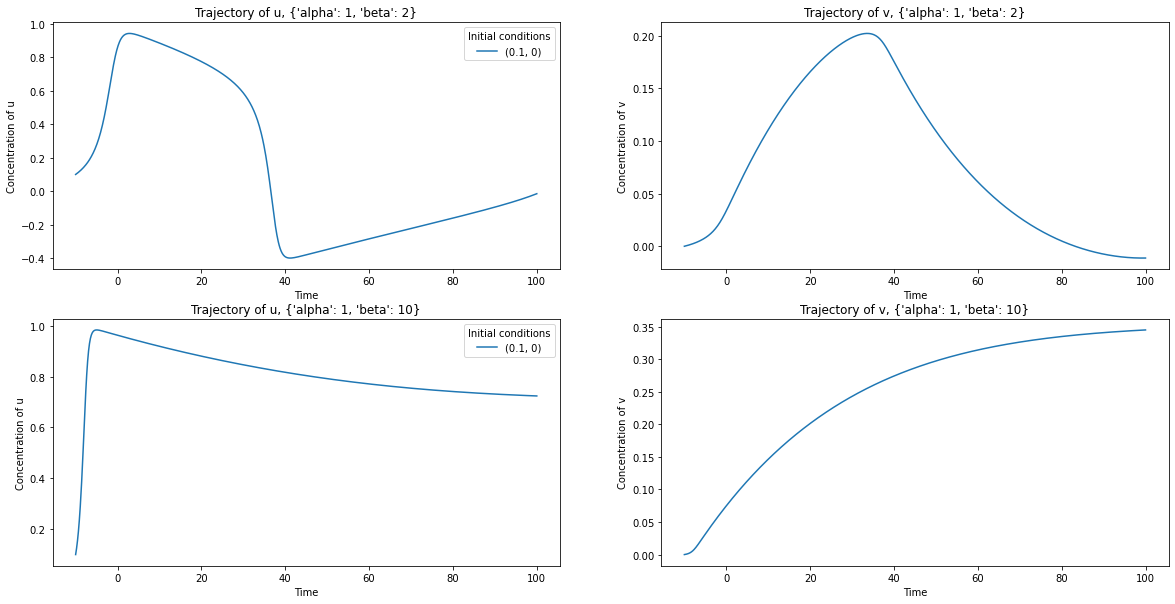

In [40]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
for i,param in enumerate(scenarios):
    for j,ic in enumerate(initial_conditions):
        ax[i][0].set(xlabel='Time', ylabel='Concentration of u', title='Trajectory of u, {}'.format(param))
        ax[i][1].set(xlabel='Time', ylabel='Concentration of v', title='Trajectory of v, {}'.format(param))
        l = ax[i][0].plot(time,trajectory[i,j][:,0], label=ic)
        ax[i][1].plot(time,trajectory[i,j][:,1], color=l[0].get_color())
    ax[i][0].legend(title='Initial conditions')

In [55]:
vspace = np.linspace(0,2,100) # define U space to be the V nullcline
rspace = np.linspace(0,2,100)  # define V space to be the R nullcline

def plot_isocline(ax, vspace, rspace, alpha, beta, color='k', style='--', opacity=.5):
    """Plot the isoclines of the symmetric cellular switch system"""

    ax.plot(vspace, vspace*(vspace-alpha)*(vspace-1), style, color=color, alpha=opacity)
    ax.plot(vspace/beta,rspace, style, color=color, alpha=opacity)
    ax.set(xlabel='u',ylabel='v')
    ax.plot()

plot_isocline(1, vspace,rspace, alpha=-.1,beta=2)

AttributeError: 'int' object has no attribute 'plot'

In [52]:
def plot_flow(ax, param, vspace, rspace):
    """Plot the flow of the symmetric cellular switch system"""
    X,Y = np.meshgrid(vspace,rspace)
    a = fhn([X,Y],0,**param)
    ax.streamplot(X,Y,a[0,:,:], a[1,:,:], color=(0,0,0,.1))
    ax.set(xlim=(vspace.min(),vspace.max()), ylim=(rspace.min(),rspace.max()))